# Air accidents analysis - Parsing & Data cleaning

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import time
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
type_, operators = [], []
fatalities, first_flight = [], []
dates, country = [], []
damage, location = [], []
phase, nature = [], []
time_ = []
crew, passengers = [], []

In [ ]:
# # random_years = np.random.randint(1919, 2021, size=10, dtype=int)
# range_list = [range(1919, 2022)[:25], range(1919, 2022)[25:50], range(1919, 2022)[50:75], range(1919, 2022)[75:]]

# for period in tqdm(range_list):
#   time.sleep(3)
#   pass

#   for years in period:
#     url = f'https://aviation-safety.net/database/dblist.php?Year={years}'
#     response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
#     response.encoding = 'utf-8'
#     soup = BeautifulSoup(response.text, 'html.parser')

#     try:
#       last_page = int(soup.find('div', class_="pagenumbers").find_all('a')[-1].text)
#     except:
#       last_page = 1

#     time.sleep(3)

#     for page in range(1, last_page+1):
#       url = f'https://aviation-safety.net/database/dblist.php?Year={years}&lang=&page={page}]'
#       response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
#       response.encoding = 'utf-8'
#       soup = BeautifulSoup(response.text, 'html.parser')
#       rows = soup.find_all('tr')
#       time.sleep(.3)

#       for row in rows[1:]:
#         links = []
#         casualty = row.find('td', class_='listdata').text
#         if (casualty != '') & (casualty != '0'): # we collect data only for accidents with casualties
#           # collect fatalities data
#           fatalities.append(casualty)
#           # collect dates
#           date = row.find('nobr').text
#           dates.append(date)
#           # collect links
#           link_end = row.find('nobr').find('a', href=True)['href']
#           links.append('https://aviation-safety.net' + link_end)
#           # collect aircraft type
#           aircraft_type = row.find_all('nobr')[1].text
#           type_.append(aircraft_type)
#           # collect reg number
#           operator = row.find_all('td')[3].text
#           operators.append(operator)
#           time.sleep(.3)

#           for link in links:
#             response = requests.get(link, headers={'User-Agent': 'Mozilla/5.0'})
#             response.encoding = 'utf-8'
#             soup = BeautifulSoup(response.text, 'html.parser')

#             try:
#               location.append(soup.find(text='Location:').next_element.find('a').text)
#             except:
#               location.append(np.NaN)
#             try:
#               damage.append(soup.find(text='Aircraft damage:').next_element.text.strip())
#             except:
#               damage.append(np.NaN)
#             try:
#               phase.append(soup.find(text='Phase:').next_element.text.strip())
#             except:
#               phase.append(np.NaN)
#             try:
#               nature.append(soup.find(text='Nature:').next_element.text.strip())
#             except:
#               nature.append(np.NaN)
#             try:
#               time_.append(soup.find(text='Time:').next_element.text[-5:])
#             except:
#               time_.append(np.NaN)
#             try:
#               crew.append(int(re.compile('[0-9]+$').findall(soup.find(text='Crew:').next_element.text.split('/')[1])[0]))
#             except:
#               crew.append(np.NaN)
#             try:
#               passengers.append(int(re.compile('[0-9]+$').findall(soup.find(text='Passengers:').next_element.text.split('/')[1])[0]))
#             except:
#               passengers.append(np.NaN)
#             try:
#               first_flight.append(soup.find(text='First flight:').next_element.text.strip())
#             except:
#               first_flight.append('')
#             time.sleep(1)

100%|██████████| 4/4 [4:08:09<00:00, 3722.26s/it]


In [ ]:
dict = {'date': dates,
        'time': time_,
        'type': type_,
        'location': location,
        'fatalities': fatalities,
        'ground_fatalities': fatalities,
        'crew': crew,
        'passengers': passengers,
        'operator': operators,
        'first_flight': first_flight,
        'damage': damage,
        'phase': phase,
        'nature': nature}

df = pd.DataFrame(dict)

In [ ]:
data = df.copy()

In [ ]:
df.isna().sum()

date                    0
time                 4499
type                    0
location               13
fatalities              0
ground_fatalities       0
crew                 1413
passengers           1419
operator                0
first_flight            0
damage                 13
phase                  13
nature                 13
dtype: int64

In [ ]:
df.dropna(axis=0, thresh=6, inplace=True)

In [ ]:
df.shape

(9230, 13)

In [ ]:
df['date'] = pd.to_datetime(df.date, errors='coerce', format='%d-%b-%Y')
df['time'] = pd.to_datetime(df.time, errors='coerce', format='%H:%M').dt.time

In [ ]:
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [ ]:
df['ground_fatalities'] = df.fatalities.apply(lambda x: x.split(' ')[1] if x.find(' ')>0 else 0).astype('int32')
df['fatalities'] = df.fatalities.apply(lambda x: x.split('+')[0]).astype('int32')

In [ ]:
df['first_flight'] = df.first_flight.apply(lambda x: x.split('-')[0] if x.find('-')>0 else x)
df['first_flight'] = pd.to_datetime(df.first_flight, errors='coerce', format='%Y')

In [ ]:
df['manufacturer'] = df['type'].apply(lambda x: x.split(' ')[0])

In [ ]:
df.shape

(9230, 16)

In [ ]:
df.sample(20)

,date,time,type,location,fatalities,ground_fatalities,crew,passengers,operator,first_flight,damage,phase,nature,month,day,manufacturer
5107,1971-12-09,12:25:00,HAL-748,India,21,0,4,27,Indian Airlines,1968-01-01,Destroyed,En route (ENR),Domestic Scheduled Passenger,December,Thursday,HAL-748
3570,1959-07-15,NaT,Curtiss C-46A,Brazil,2,0,3,0,Paraense Transportes A�reos,1944-01-01,Damaged beyond repair,En route (ENR),Cargo,July,Wednesday,Curtiss
6348,1982-07-14,NaT,Swearingen SA226-AT Merlin IV,South Africa,8,0,3,5,"South African AF, lsf South African Police",1975-01-01,Damaged beyond repair,Unknown (UNK),Military,July,Wednesday,Swearingen
5410,1973-12-19,NaT,Antonov An-2TP,Russia,2,0,2,0,"Aeroflot, Uralsk",1967-01-01,Damaged beyond repair,En route (ENR),Unknown,December,Wednesday,Antonov
6777,1987-05-11,NaT,Lockheed C-130 Hercules,South Sudan,5,0,nan,nan,Sudan AF,NaT,Damaged beyond repair,Unknown (UNK),Military,May,Monday,Lockheed
7371,1993-01-06,19:20:00,DHC-8-311,France,4,0,4,19,"Lufthansa CityLine, op.for Contact Air",1990-01-01,Destroyed,Approach (APR),International Scheduled Passenger,January,Wednesday,DHC-8-311
65,1934-03-22,NaT,Ford 5-AT-C Tri-Motor,Peru,4,0,3,12,Panagra,1929-01-01,Damaged beyond repair,Takeoff (TOF),International Scheduled Passenger,March,Thursday,Ford
1941,1947-02-21,NaT,Douglas C-47 (DC-3),China,21,0,nan,nan,China Air Force,NaT,Damaged beyond repair,Unknown (UNK),Military,February,Friday,Douglas
5548,1975-01-02,NaT,Lockheed C-130B Hercules,United States of America,2,0,6,0,USAF,1959-01-01,Damaged beyond repair,Takeoff (TOF),Military,January,Thursday,Lockheed
2633,1952-01-19,01:38:00,Douglas C-54E (DC-4),Canada,36,0,3,40,Northwest Orient Airlines,1945-01-01,Damaged beyond repair,Initial climb (ICL),Domestic Non Scheduled Passenger,January,Saturday,Douglas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9230 entries, 0 to 9229
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9220 non-null   datetime64[ns]
 1   time               4480 non-null   object        
 2   type               9230 non-null   object        
 3   location           9217 non-null   object        
 4   fatalities         9230 non-null   int32         
 5   ground_fatalities  9230 non-null   int32         
 6   crew               7817 non-null   float64       
 7   passengers         7811 non-null   float64       
 8   operator           9230 non-null   object        
 9   first_flight       7071 non-null   datetime64[ns]
 10  damage             9217 non-null   object        
 11  phase              9217 non-null   object        
 12  nature             9217 non-null   object        
 13  month              9220 non-null   object        
 14  day     

In [ ]:
df.isna().sum()

date                   10
time                 4750
type                    0
location               13
fatalities              0
ground_fatalities       0
crew                 1413
passengers           1419
operator                0
first_flight         2159
damage                 13
phase                  13
nature                 13
month                  10
day                    10
manufacturer            0
dtype: int64

In [ ]:
# save data to google drive

df.to_csv('data_air_accidents.csv')
!cp data_air_accidents.csv "drive/My Drive/"

In [ ]:
!gdown --id '1VLl_11i69d_n_fSIlsYDqcfgjsCHfngX'

Downloading...
From: https://drive.google.com/uc?id=1VLl_11i69d_n_fSIlsYDqcfgjsCHfngX
To: /content/data_air_accidents.csv
100% 1.47M/1.47M [00:00<00:00, 23.2MB/s]


In [ ]:
df = pd.read_csv('/content/data_air_accidents.csv')

In [ ]:
df.isna().sum()

Unnamed: 0              0
date                   10
time                 4750
type                    0
location               14
fatalities              0
ground_fatalities       0
crew                 1413
passengers           1419
operator                0
first_flight         2159
damage                 13
phase                  13
nature                 13
month                  10
day                    10
manufacturer            0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,date,time,type,location,fatalities,ground_fatalities,crew,passengers,operator,first_flight,damage,phase,nature,month,day,manufacturer
0,0,1919-08-02,NaN,Caproni Ca.48,Italy,14,0,2,12,Caproni,1919-01-01,Destroyed,En route (ENR),Passenger,August,Saturday,Caproni
1,1,1919-08-11,NaN,Felixstowe Fury,United Kingdom,1,0,7,0,RAF,1918-01-01,Damaged beyond repair,Initial climb (ICL),Test,August,Monday,Felixstowe
2,2,1920-12-14,12:15:00,Handley Page O/400,United Kingdom,4,0,2,6,Handley Page Transport,NaN,Damaged beyond repair,Initial climb (ICL),International Scheduled Passenger,December,Tuesday,Handley
3,3,1921-08-26,13:32:00,Farman F.60 Goliath,France,2,0,2,0,SNETA,1920-01-01,Substantial,En route (ENR),Cargo,August,Friday,Farman
4,4,1922-03-31,10:00:00,Handley Page O/7,China,14,0,nan,nan,Chinese Government,NaN,Damaged beyond repair,Approach (APR),Domestic Non Scheduled Passenger,March,Friday,Handley


In [ ]:
df['date'].fillna(method='bfill', inplace=True)

In [ ]:
df.drop(['Unnamed: 0', 'time', 'month', 'day'], 1, inplace=True)

In [ ]:
df = df[df['location'].notna()]

In [ ]:
df.isna().sum()

date                    0
type                    0
location                0
fatalities              0
ground_fatalities       0
crew                 1399
passengers           1405
operator                0
first_flight         2145
damage                  0
phase                   0
nature                  0
manufacturer            0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df.date)
df['first_flight'] = pd.to_datetime(df.first_flight)

In [ ]:
df.sample(17)

,date,type,location,fatalities,ground_fatalities,crew,passengers,operator,first_flight,damage,phase,nature,manufacturer
1529,1945-03-24,Douglas C-47A (DC-3),Germany,1,0,4,1,USAAF,1944-01-01,Damaged beyond repair,En route (ENR),Military,Douglas
4421,1966-09-07,Antonov An-2,Tajikistan,6,0,2,4,"Aeroflot, Tajikistan",1961-01-01,Damaged beyond repair,En route (ENR),Survey/research,Antonov
4955,1970-07-20,Hawker Siddeley HS-125-3B,United Kingdom,1,0,2,0,Imperial Tobacco Group,1961-01-01,Damaged beyond repair,Takeoff (TOF),Training,Hawker
8037,2000-05-25,Shorts 330-200,France,1,0,2,0,Streamline Aviation,1981-01-01,Damaged beyond repair,Takeoff (TOF),Cargo,Shorts
1550,1945-04-10,Douglas C-47A (DC-3),Germany,5,0,5,0,USAAF,1944-01-01,Damaged beyond repair,Landing (LDG),Military,Douglas
7340,1992-09-26,Lockheed C-130H Hercules,Nigeria,159,0,8,151,Nigerian AF,1975-01-01,Destroyed,En route (ENR),Military,Lockheed
8731,2010-12-28,Antonov An-22A,Russia,12,0,12,0,Russian AF,1974-01-01,Destroyed,En route (ENR),Military,Antonov
856,1943-12-04,Douglas C-47 (DC-3),United States of America,1,0,3,0,USAAF,1942-01-01,Damaged beyond repair,En route (ENR),Military,Douglas
5476,1974-07-06,Antonov An-24T,Russia,5,0,5,0,Soviet AF,NaT,Damaged beyond repair,Approach (APR),Military,Antonov
3015,1955-01-13,Lisunov Li-2,Russia,5,0,5,0,"Aeroflot, Moscow",1953-01-01,Damaged beyond repair,Initial climb (ICL),Cargo,Lisunov


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9216 entries, 0 to 9229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               9216 non-null   datetime64[ns]
 1   type               9216 non-null   object        
 2   location           9216 non-null   object        
 3   fatalities         9216 non-null   int64         
 4   ground_fatalities  9216 non-null   int64         
 5   crew               7817 non-null   float64       
 6   passengers         7811 non-null   float64       
 7   operator           9216 non-null   object        
 8   first_flight       7071 non-null   datetime64[ns]
 9   damage             9216 non-null   object        
 10  phase              9216 non-null   object        
 11  nature             9216 non-null   object        
 12  manufacturer       9216 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(7)
memory us

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day_name()

In [ ]:
df_clean = df.dropna(0, 'any')

In [ ]:
df_clean['aircraft_age'] = df_clean['date'] - df_clean['first_flight']
df_clean['aircraft_age'] = df_clean.aircraft_age.dt.days.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_clean.head()

,date,type,location,fatalities,ground_fatalities,crew,passengers,operator,first_flight,damage,phase,nature,manufacturer,aircraft_age,year,month,day
0,1919-08-02,Caproni Ca.48,Italy,14,0,2,12,Caproni,1919-01-01,Destroyed,En route (ENR),Passenger,Caproni,213,1919,August,Saturday
1,1919-08-11,Felixstowe Fury,United Kingdom,1,0,7,0,RAF,1918-01-01,Damaged beyond repair,Initial climb (ICL),Test,Felixstowe,587,1919,August,Monday
3,1921-08-26,Farman F.60 Goliath,France,2,0,2,0,SNETA,1920-01-01,Substantial,En route (ENR),Cargo,Farman,603,1921,August,Friday
5,1922-04-07,Farman F.60 Goliath,France,5,0,2,3,Grands Express A�riens,1920-01-01,Damaged beyond repair,En route (ENR),International Scheduled Passenger,Farman,827,1922,April,Friday
7,1923-05-14,Farman F.60 Goliath,France,6,0,2,4,Air Union,1922-01-01,Damaged beyond repair,En route (ENR),International Scheduled Passenger,Farman,498,1923,May,Monday


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391 entries, 0 to 9229
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               6391 non-null   datetime64[ns]
 1   type               6391 non-null   object        
 2   location           6391 non-null   object        
 3   fatalities         6391 non-null   int64         
 4   ground_fatalities  6391 non-null   int64         
 5   crew               6391 non-null   float64       
 6   passengers         6391 non-null   float64       
 7   operator           6391 non-null   object        
 8   first_flight       6391 non-null   datetime64[ns]
 9   damage             6391 non-null   object        
 10  phase              6391 non-null   object        
 11  nature             6391 non-null   object        
 12  manufacturer       6391 non-null   object        
 13  year               6391 non-null   int64         
 14  month   

In [ ]:
# save data to google drive

df_clean.to_csv('data_air_accidents_clean.csv')

In [ ]:
df[df['location']=='United States of America']

,date,type,location,fatalities,ground_fatalities,crew,passengers,operator,first_flight,damage,phase,nature,manufacturer,year,month,day
15,1928-05-12,Ford 4-AT-A Tri-Motor,United States of America,2,0,2,0,Ford Air Freight Lines,1926-01-01,Damaged beyond repair,Takeoff (TOF),Cargo,Ford,1928,May,Saturday
17,1928-08-25,Ford 4-AT-B Tri-Motor,United States of America,7,0,2,5,British Columbia Airways,1928-01-01,Damaged beyond repair,En route (ENR),International Scheduled Passenger,Ford,1928,August,Saturday
18,1928-11-23,Ford 4-AT-B Tri-Motor,United States of America,3,0,2,3,Spokane Airways,1928-01-01,Destroyed,Approach (APR),Domestic Non Scheduled Passenger,Ford,1928,November,Friday
19,1928-12-01,Ford 4-AT-C Tri-Motor,United States of America,5,0,1,4,Sunbeam Air Transport Co.,1928-01-01,Damaged beyond repair,En route (ENR),Domestic Non Scheduled Passenger,Ford,1928,December,Saturday
21,1929-03-17,Ford 4-AT-B Tri-Motor,United States of America,14,0,1,14,Colonial Western Airlines,1928-01-01,Damaged beyond repair,Initial climb (ICL),Domestic Non Scheduled Passenger,Ford,1929,March,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,2021-01-09,Cessna 560 Citation V,United States of America,1,0,1,0,SX Transport LLC,1989-01-01,Destroyed,En route (ENR),Unknown,Cessna,2021,January,Saturday
9212,2021-05-29,Cessna 501 Citation I/SP,United States of America,7,0,1,6,JL&GL Productions LP,1982-01-01,Destroyed,Initial climb (ICL),Private,Cessna,2021,May,Saturday
9221,2021-07-26,Bombardier Challenger 605,United States of America,6,0,2,4,Tarco Aircraft Funding,2008-01-01,Destroyed,Approach (APR),Private,Bombardier,2021,July,Monday
9224,2021-09-02,Cessna 560 Citation XLS+,United States of America,4,0,2,2,Brook Haven Properties LLC,2009-01-01,Destroyed,Takeoff (TOF),Unknown,Cessna,2021,September,Thursday


Добавить ID, добавить столбец выжившие (можно в Tableau)

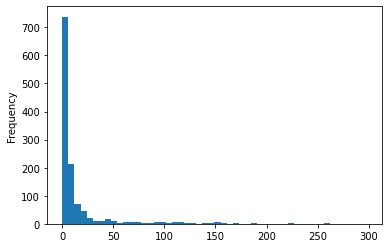

In [ ]:
df['fatalities'].plot.hist(bins=50);

In [ ]:
df['fatalities'].sum()

18645

In [ ]:
df['ground_fatalities'].sum()

3089

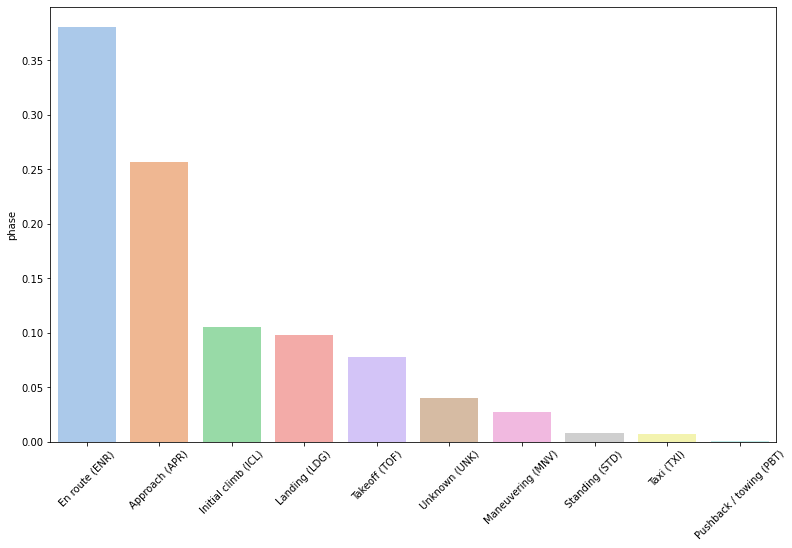

In [ ]:
fig = plt.figure(figsize=(13, 8))
plt.xticks(rotation='45')
sns.barplot(x = df['phase'].value_counts(normalize=True).index,
            y = df['phase'].value_counts(normalize=True), palette = "pastel");

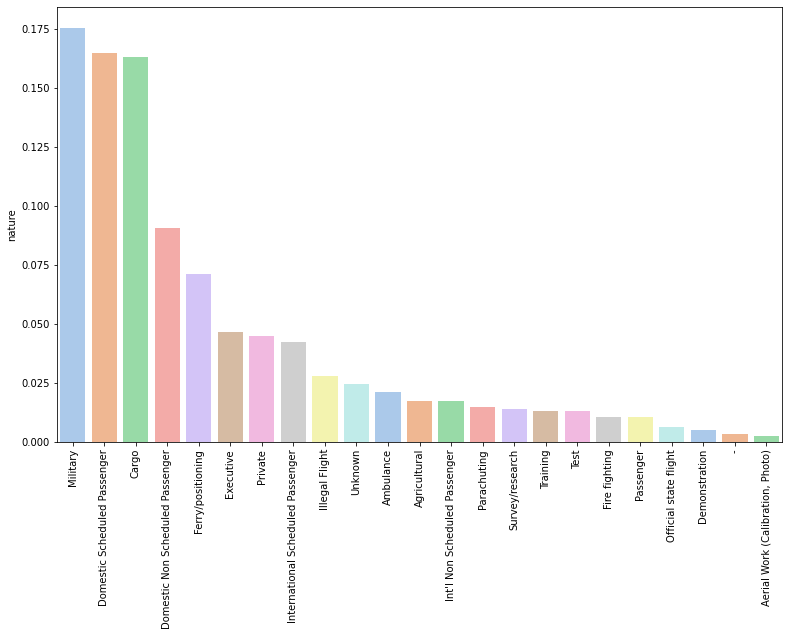

In [ ]:
fig = plt.figure(figsize=(13, 8))
plt.xticks(rotation='90')
sns.barplot(x = df['nature'].value_counts(normalize=True).index,
            y = df['nature'].value_counts(normalize=True), palette = "pastel");

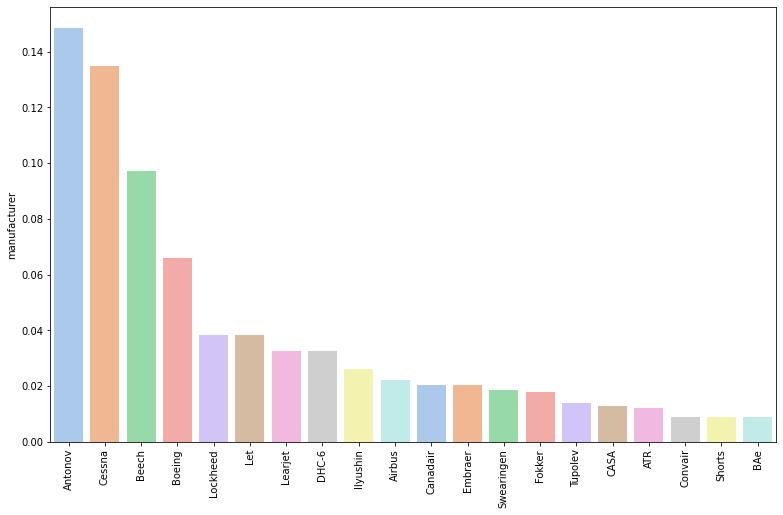

In [ ]:
fig = plt.figure(figsize=(13, 8))
plt.xticks(rotation='90')
sns.barplot(x = df['manufacturer'].value_counts(normalize=True)[:20].index,
            y = df['manufacturer'].value_counts(normalize=True)[:20], palette = "pastel");

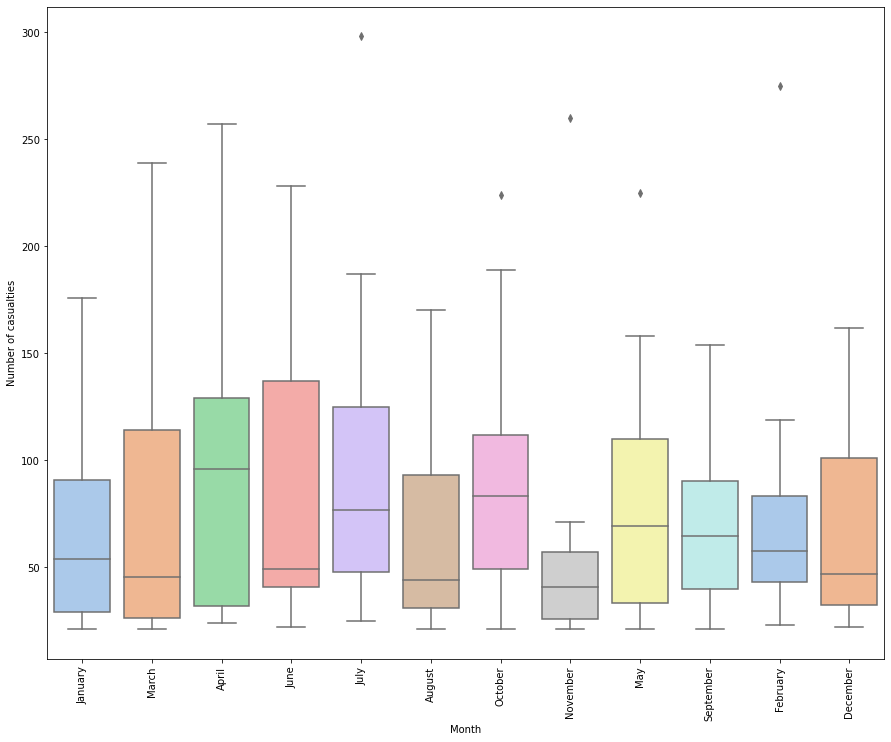

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="month", y="fatalities", data=df[df.fatalities>20], palette = "pastel")
# plt.title("Price Distribution by Car Manufacturer", fontsize=15)
plt.xticks(rotation='90')
plt.xlabel('Month')
plt.ylabel('Number of casualties')
plt.show()

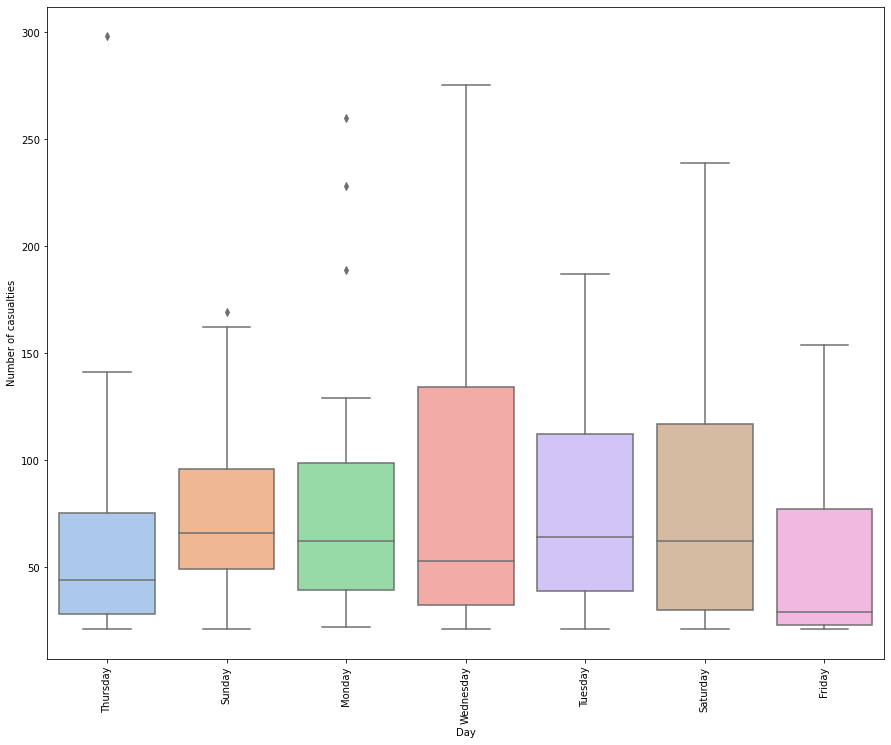

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="day", y="fatalities", data=df[df.fatalities>20], palette = "pastel")
# plt.title("Price Distribution by Car Manufacturer", fontsize=15)
plt.xticks(rotation='90')
plt.xlabel('Day')
plt.ylabel('Number of casualties')
plt.show()

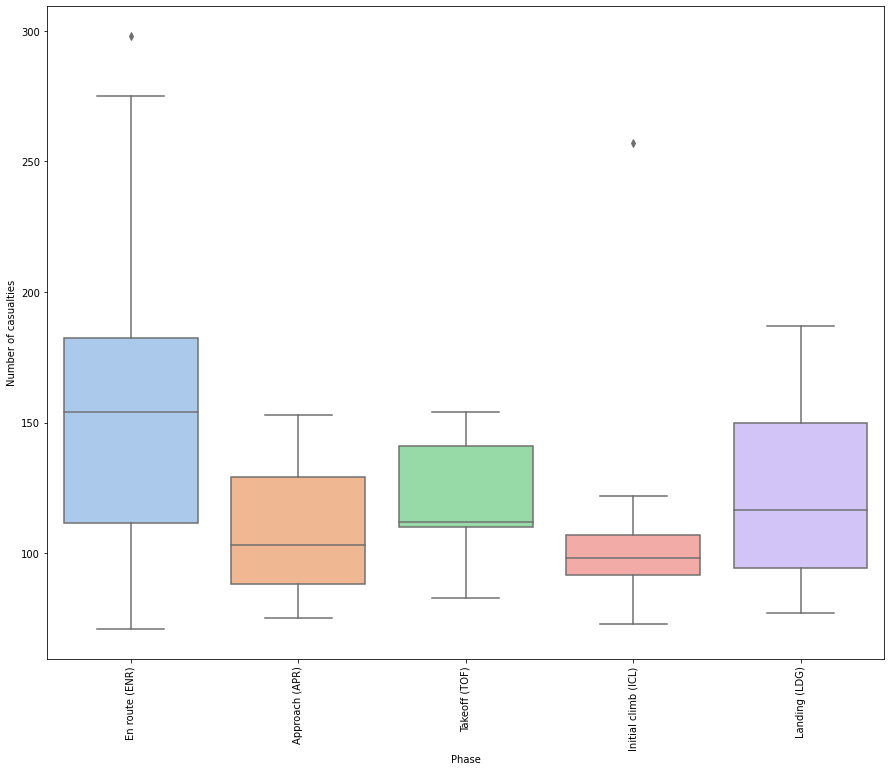

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="phase", y="fatalities", data=df[df.fatalities>70], palette = "pastel")
# sns.boxplot(x="phase", y="fatalities", data=df, palette = "pastel")
# plt.title("Price Distribution by Car Manufacturer", fontsize=15)
plt.xticks(rotation='90')
plt.xlabel('Phase')
plt.ylabel('Number of casualties')
plt.show()

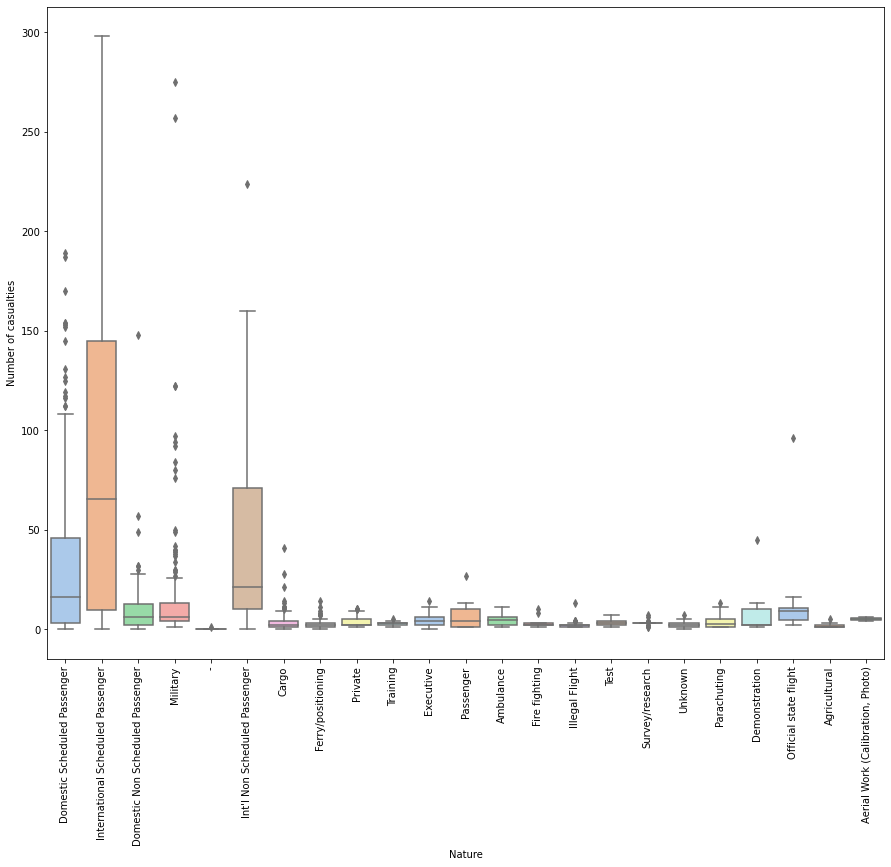

In [ ]:
plt.figure(figsize=(15, 12))
# sns.boxplot(x="nature", y="fatalities", data=df[df.fatalities>70], palette = "pastel")
sns.boxplot(x="nature", y="fatalities", data=df, palette = "pastel")
# plt.title("Price Distribution by Car Manufacturer", fontsize=15)
plt.xticks(rotation='90')
plt.xlabel('Nature')
plt.ylabel('Number of casualties')
plt.show()

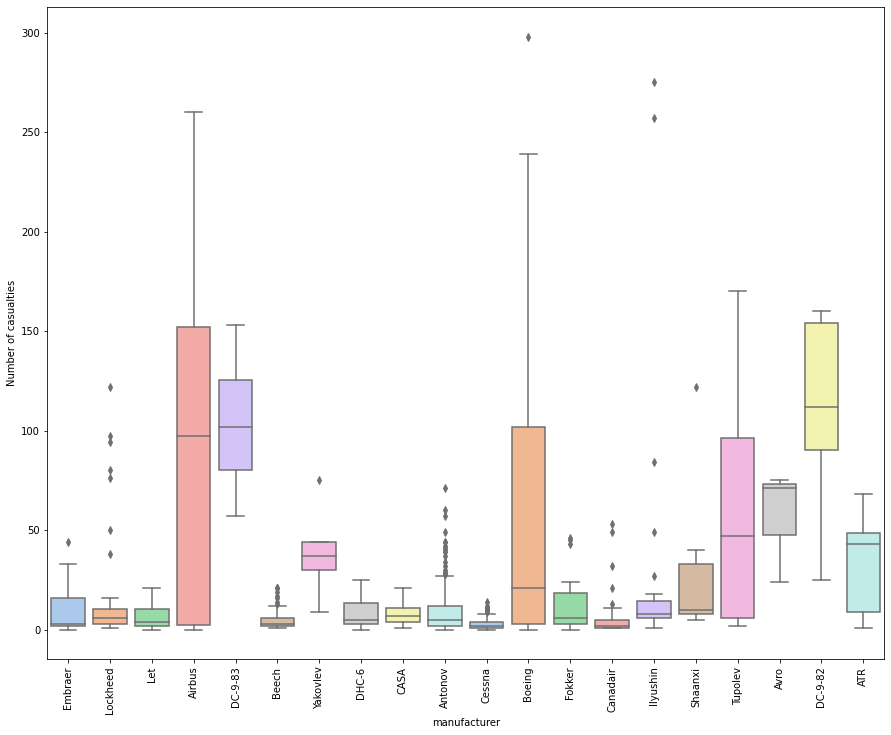

In [ ]:
plt.figure(figsize=(15, 12))
# sns.boxplot(x="manufacturer", y="fatalities", data=df[df.fatalities>70], palette = "pastel")
sns.boxplot(x="manufacturer", y="fatalities", data=df[df.manufacturer.isin(df.groupby('manufacturer')['fatalities'].sum().sort_values(ascending=False)[:20].index)], palette = "pastel")
# plt.title("Price Distribution by Car Manufacturer", fontsize=15)
plt.xticks(rotation='90')
plt.xlabel('manufacturer')
plt.ylabel('Number of casualties')
plt.show()

In [ ]:
df.groupby('manufacturer')['fatalities'].sum().sort_values(ascending=False)[:20]

manufacturer
Boeing      4674
Airbus      2386
Antonov     1790
Tupolev     1121
Ilyushin     910
Lockheed     793
Beech        571
DC-9-82      541
Cessna       527
ATR          493
DC-9-83      414
DHC-6        333
Let          326
Fokker       274
Embraer      236
Canadair     215
Yakovlev     195
Shaanxi      195
Avro         170
CASA         137
Name: fatalities, dtype: int32